In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.models import mobilenet_v2
from torch.nn import BCELoss
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [3]:
import torchvision
from torchvision import datasets
train_dataset = datasets.ImageFolder(root='train_img/train', transform=transform)

In [13]:
test_dataset = datasets.ImageFolder(root='test_img/test',transform=transform)

In [14]:
from torch.utils.data import DataLoader
train_data  = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_data = DataLoader(test_dataset, batch_size = 64, shuffle = False)

In [ ]:
MOBILENET:

In [4]:
mobilenet = mobilenet_v2(pretrained=True)

C:\Users\Transfer ID\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Transfer ID\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
mobilenet

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [6]:
for each in mobilenet.parameters():
  each.requires_grad = False

In [7]:
mobilenet.classifier[1]

Linear(in_features=1280, out_features=1000, bias=True)

In [17]:
mobilenet.classifier[1] = nn.Sequential(torch.nn.Linear(mobilenet.last_channel, 1),nn.Sigmoid())

In [18]:
mobilenet

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [19]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.criterion = nn.BCELoss()
optimizer = optim.Adam(mobilenet.parameters(), lr = 0.001)

In [20]:
for epoch in range(10):
  mobilenet.train()
  running_loss = 0.0
  train_loss=[]
  for images, labels in train_data:
    images, labels=images.float(),labels.float()
    outputs = mobilenet(images).squeeze()
    
    
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss
    train_loss.append(loss.item())
    
  print('Epoch:', epoch, 'Loss:', running_loss)

Epoch: 0 Loss: tensor(13.4653, grad_fn=<AddBackward0>)
Epoch: 1 Loss: tensor(6.6766, grad_fn=<AddBackward0>)
Epoch: 2 Loss: tensor(5.3729, grad_fn=<AddBackward0>)
Epoch: 3 Loss: tensor(4.3558, grad_fn=<AddBackward0>)
Epoch: 4 Loss: tensor(4.2859, grad_fn=<AddBackward0>)
Epoch: 5 Loss: tensor(3.7673, grad_fn=<AddBackward0>)
Epoch: 6 Loss: tensor(3.5284, grad_fn=<AddBackward0>)
Epoch: 7 Loss: tensor(3.7631, grad_fn=<AddBackward0>)
Epoch: 8 Loss: tensor(3.1752, grad_fn=<AddBackward0>)
Epoch: 9 Loss: tensor(3.3776, grad_fn=<AddBackward0>)


212
216
Accuracy: 98.14814814814815
Train_loss: 0.26123714447021484


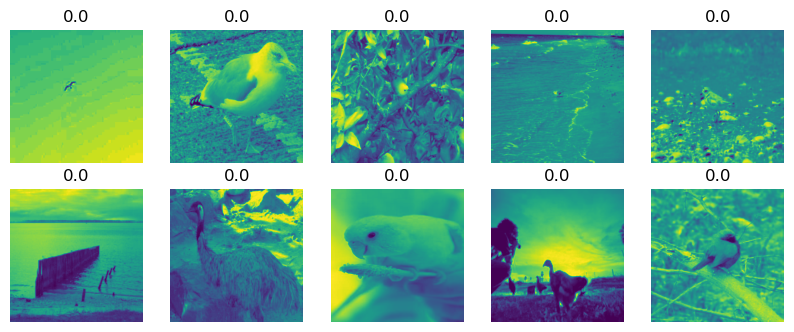

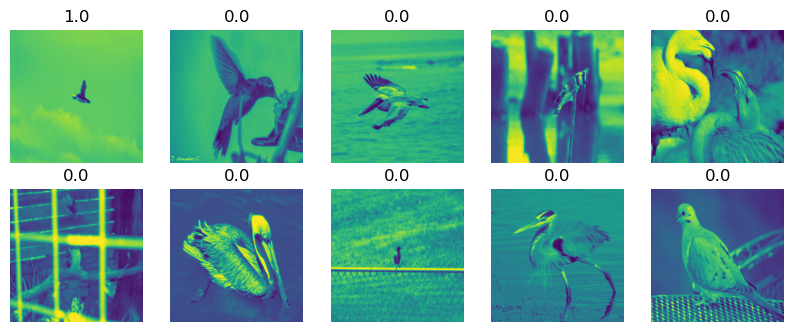

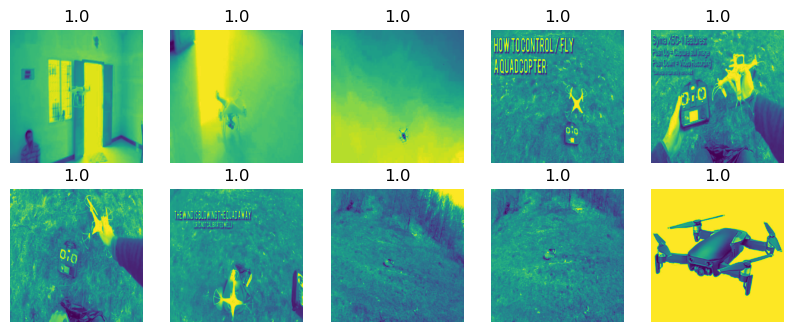

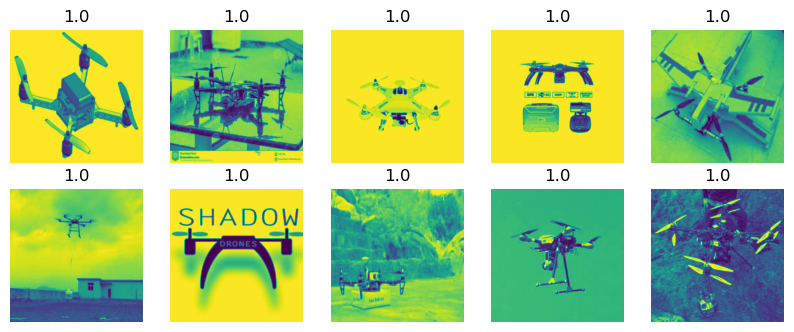

In [23]:
import torch
with torch.no_grad():
    correct=0
    total=0
    train_losses=0
    test_loss=[]
    mobilenet.eval()
    for imag,lab in test_data:
        imag,lab=imag.float(),lab.float()
        prob = mobilenet(imag).squeeze()
        val_loss = criterion(prob, lab)
        preds = (prob > 0.5).float()
        correct+=(preds==lab).sum().item()
        total+=lab.size(0)
        train_losses+=val_loss
        test_loss.append(val_loss.item())
        plt.figure(figsize=(10,10))
        for i in range(10):
            plt.subplot(5,5,i+1)
            plt.imshow(imag[i][0])
            plt.title(preds[i].item())
            plt.axis('off')

    epoch_acc = correct / total * 100
    print(correct)
    print(total)
    print("Accuracy:",epoch_acc)
    print("Train_loss:",train_losses.item())

In [ ]:
MODEL EVALUATION:

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

precision = precision_score(lab,preds,average='macro')
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(lab,preds,average='macro')
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(lab,preds,average='macro')
print(f"F1-Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(lab,preds))

Precision: 0.50
Recall: 0.48
F1-Score: 0.49

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.96      0.98        24

    accuracy                           0.96        24
   macro avg       0.50      0.48      0.49        24
weighted avg       1.00      0.96      0.98        24



C:\Users\Transfer ID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Transfer ID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Transfer ID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Transfer ID\anaconda3\Lib\site-packag

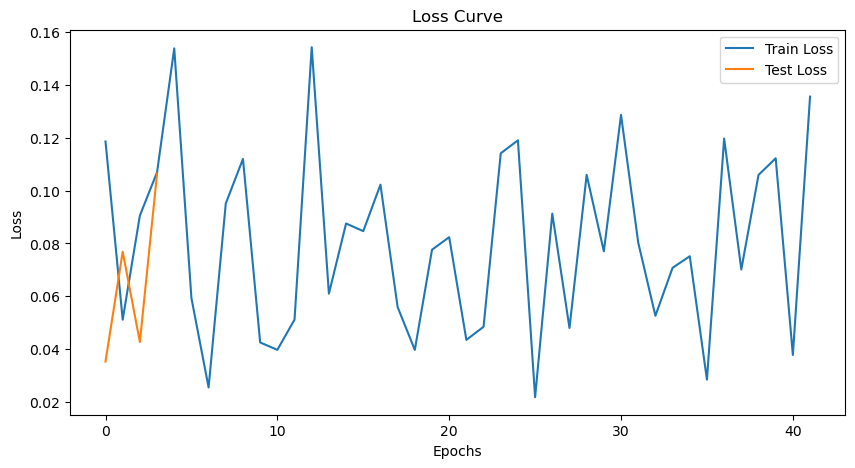

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [25]:
import joblib
joblib.dump(mobilenet, 'mobilenet.model')

['mobilenet.model']